<a href="https://colab.research.google.com/github/advaitjk/machine-learning-master-course/blob/master/CNN_Classifying_the_Dogs_Cats_Horses_Humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Google Colab

In [0]:
# Cats-Dogs-Horses-Humans Dataset: Kaggle

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import os

In [0]:
folders = os.listdir("/content/gdrive/My Drive/Images")

In [0]:
for f in folders:
  path = "/content/gdrive/My Drive/Images/" + f
  print((os.listdir(path))) 

['rider-147.jpg', 'rider-153.jpg', 'rider-70.jpg', 'rider-64.jpg', 'rider-152.jpg', 'rider-71.jpg', 'rider-186.jpg', 'rider-190.jpg', 'rider-59.jpg', 'rider-65.jpg', 'rider-184.jpg', 'rider-145.jpg', 'rider-192.jpg', 'rider-151.jpg', 'rider-98.jpg', 'rider-67.jpg', 'rider-73.jpg', 'rider-99.jpg', 'rider-150.jpg', 'rider-144.jpg', 'rider-179.jpg', 'rider-66.jpg', 'rider-178.jpg', 'rider-72.jpg', 'rider-15.jpg', 'rider-8.jpg', 'rider-29.jpg', 'rider-193.jpg', 'rider-9.jpg', 'rider-28.jpg', 'rider-122.jpg', 'rider-187.jpg', 'rider-123.jpg', 'rider-137.jpg', 'rider-136.jpg', 'rider-121.jpg', 'rider-134.jpg', 'rider-120.jpg', 'rider-14.jpg', 'rider-16.jpg', 'rider-135.jpg', 'rider-108.jpg', 'rider-131.jpg', 'rider-13.jpg', 'rider-125.jpg', 'rider-109.jpg', 'rider-119.jpg', 'rider-17.jpg', 'rider-130.jpg', 'rider-118.jpg', 'rider-124.jpg', 'rider-12.jpg', 'rider-38.jpg', 'rider-10.jpg', 'rider-39.jpg', 'rider-133.jpg', 'rider-127.jpg', 'rider-132.jpg', 'rider-126.jpg', 'rider-11.jpg', 'rider

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
p = "/content/gdrive/My Drive/Images/"
sample_path = p + "cats/cat.202.jpg"
img = image.load_img(sample_path)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


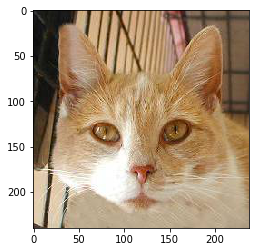

In [0]:
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.show()

In [0]:
# Creating Data Generators for Large Datasets

In [0]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
import keras.layers as layers
from keras.utils import np_utils
import tensorflow.compat.v1 as tf

In [0]:
### Building the CNN Model using Keras

In [0]:
model = keras.Sequential()
model.add(layers.Convolution2D(32, (3, 3), input_shape = (150, 150, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
print(model.summary())




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers
adam = optimizers.adam(lr = 1e-4)
model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['acc'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_gen = ImageDataGenerator(rescale=1.0/255)

In [0]:
train_generator = train_gen.flow_from_directory(p, target_size = (150, 150), batch_size = 32, class_mode = 'categorical')

Found 808 images belonging to 4 classes.


In [0]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
x, y = train_generator.next()
print(x.shape)
print(y.shape)

(32, 150, 150, 3)
(32, 4)


In [0]:
for x,y in train_generator:
  x, y = train_generator.next()
  print(x.shape)
  print(y.shape)

KeyboardInterrupt: ignored

In [0]:
model.fit_generator?

In [0]:
history = model.fit_generator(train_generator, epochs = 20, steps_per_epoch = 7)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20


FileNotFoundError: ignored

In [0]:
history = model.fit_generator(train_generator, epochs = 40, steps_per_epoch = 7)

Epoch 1/40
7/7 [==============================] - 10s 1s/step - loss: 0.9250 - acc: 0.6027
Epoch 2/40
7/7 [==============================] - 8s 1s/step - loss: 0.9541 - acc: 0.5910
Epoch 3/40
7/7 [==============================] - 8s 1s/step - loss: 0.9603 - acc: 0.6205
Epoch 4/40
7/7 [==============================] - 9s 1s/step - loss: 0.9916 - acc: 0.5759
Epoch 5/40
7/7 [==============================] - 9s 1s/step - loss: 0.8471 - acc: 0.6696
Epoch 6/40
7/7 [==============================] - 9s 1s/step - loss: 0.8626 - acc: 0.6964
Epoch 7/40
7/7 [==============================] - 7s 1s/step - loss: 0.8140 - acc: 0.6587
Epoch 8/40
7/7 [==============================] - 9s 1s/step - loss: 0.9408 - acc: 0.5938
Epoch 9/40
7/7 [==============================] - 8s 1s/step - loss: 0.8933 - acc: 0.6269
Epoch 10/40
7/7 [==============================] - 9s 1s/step - loss: 0.8229 - acc: 0.6562
Epoch 11/40
7/7 [==============================] - 8s 1s/step - loss: 0.8504 - acc: 0.5938
Epoch 1

# Creating a Validation Set from the Training Dataset

In [0]:
import os, shutil

In [0]:
folders = os.listdir(p)

In [0]:
if not os.path.isdir("val_images"):
  os.mkdir("val_images")
classes = ["dogs", "cats", "horses", "humans"]
!ls "val_images/dogs"

In [0]:
for c in classes:
  path = os.path.join("val_images/", c)
  if not os.path.isdir(path):
    os.mkdir(path)

In [0]:
SPLIT = 0.9

In [0]:
for f in os.listdir(p):
  path = p + f
  imgs = os.listdir(path)

  split_size = int(SPLIT * len(imgs))
  files_to_move = imgs[split_size:]
  print(len(files_to_move))

  for img_f in files_to_move:
    src = os.path.join(path, img_f)
    dest = os.path.join("val_images/" + f, img_f)
    shutil.move(src, dest)
    print(src)
    print(dest)


21
/content/gdrive/My Drive/Images/humans/rider-56.jpg
val_images/humans/rider-56.jpg
/content/gdrive/My Drive/Images/humans/rider-161.jpg
val_images/humans/rider-161.jpg
/content/gdrive/My Drive/Images/humans/rider-80.jpg
val_images/humans/rider-80.jpg
/content/gdrive/My Drive/Images/humans/rider-202.jpg
val_images/humans/rider-202.jpg
/content/gdrive/My Drive/Images/humans/rider-81.jpg
val_images/humans/rider-81.jpg
/content/gdrive/My Drive/Images/humans/rider-148.jpg
val_images/humans/rider-148.jpg
/content/gdrive/My Drive/Images/humans/rider-200.jpg
val_images/humans/rider-200.jpg
/content/gdrive/My Drive/Images/humans/rider-68.jpg
val_images/humans/rider-68.jpg
/content/gdrive/My Drive/Images/humans/rider-54.jpg
val_images/humans/rider-54.jpg
/content/gdrive/My Drive/Images/humans/rider-189.jpg
val_images/humans/rider-189.jpg
/content/gdrive/My Drive/Images/humans/rider-40.jpg
val_images/humans/rider-40.jpg
/content/gdrive/My Drive/Images/humans/rider-163.jpg
val_images/humans/rid

In [0]:
print("Training Data")
for f in folders:
  path = p + f
  print(f + " " + str(len(os.listdir(path))))

Training Data
humans 181
dogs 181
cats 181
horses 181


In [0]:
print("Validation Data")
for f in folders:
  path = "val_images/" + f
  print(f + " " + str(len(os.listdir(path))))

Validation Data
humans 21
dogs 21
cats 21
horses 21


# Training the Model on the Validation Set and Visualising the Results

In [0]:
train_gen = ImageDataGenerator(rescale=1.0/255)
val_gen = ImageDataGenerator(rescale=1.0/255)

In [0]:
train_generator = train_gen.flow_from_directory(p, target_size = (150, 150), batch_size = 32, class_mode = 'categorical')
val_generator = train_gen.flow_from_directory("val_images/", target_size = (150, 150), batch_size = 32, class_mode = 'categorical')

Found 724 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [0]:
model = keras.Sequential()
model.add(layers.Convolution2D(32, (3, 3), input_shape = (150, 150, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [0]:
from keras import optimizers
adam = optimizers.adam(lr = 1e-4)
model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['acc'])

In [0]:
history = model.fit_generator(train_generator, epochs = 50, steps_per_epoch = 7, validation_data = val_generator, validation_steps= 4)

Epoch 1/50
7/7 [==============================] - 1s 140ms/step - loss: 0.8606 - acc: 0.6529 - val_loss: 0.8734 - val_acc: 0.5862
Epoch 2/50
7/7 [==============================] - 1s 145ms/step - loss: 0.9823 - acc: 0.6071 - val_loss: 0.9690 - val_acc: 0.5603
Epoch 3/50
7/7 [==============================] - 1s 115ms/step - loss: 0.9654 - acc: 0.6161 - val_loss: 0.9005 - val_acc: 0.6346
Epoch 4/50
7/7 [==============================] - 1s 134ms/step - loss: 0.8594 - acc: 0.6741 - val_loss: 0.9629 - val_acc: 0.5862
Epoch 5/50
7/7 [==============================] - 1s 122ms/step - loss: 0.7952 - acc: 0.7097 - val_loss: 0.8437 - val_acc: 0.5776
Epoch 6/50
7/7 [==============================] - 1s 138ms/step - loss: 0.8853 - acc: 0.6250 - val_loss: 0.9053 - val_acc: 0.6442
Epoch 7/50
7/7 [==============================] - 1s 93ms/step - loss: 0.9116 - acc: 0.6194 - val_loss: 0.8203 - val_acc: 0.6379
Epoch 8/50
7/7 [==============================] - 1s 134ms/step - loss: 0.8157 - acc: 0.660

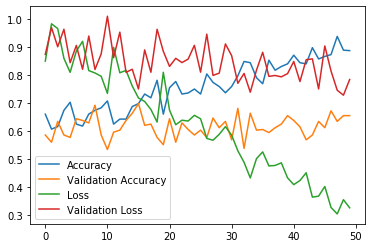

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label = "Accuracy")
plt.plot(val_acc, label = "Validation Accuracy")
plt.plot(loss, label = "Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.show()
